### Real World Data Preprocessing

Found 3 zero values in column 500_Pound_Barrel_Cheese_Price
Replaced value at 2013-09-28 00:00:00 with 1.8723
Replaced value at 2013-10-05 00:00:00 with 1.8695
Replaced value at 2013-10-12 00:00:00 with 1.8774
Preprocessed data saved to dairy_preprocessed.csv


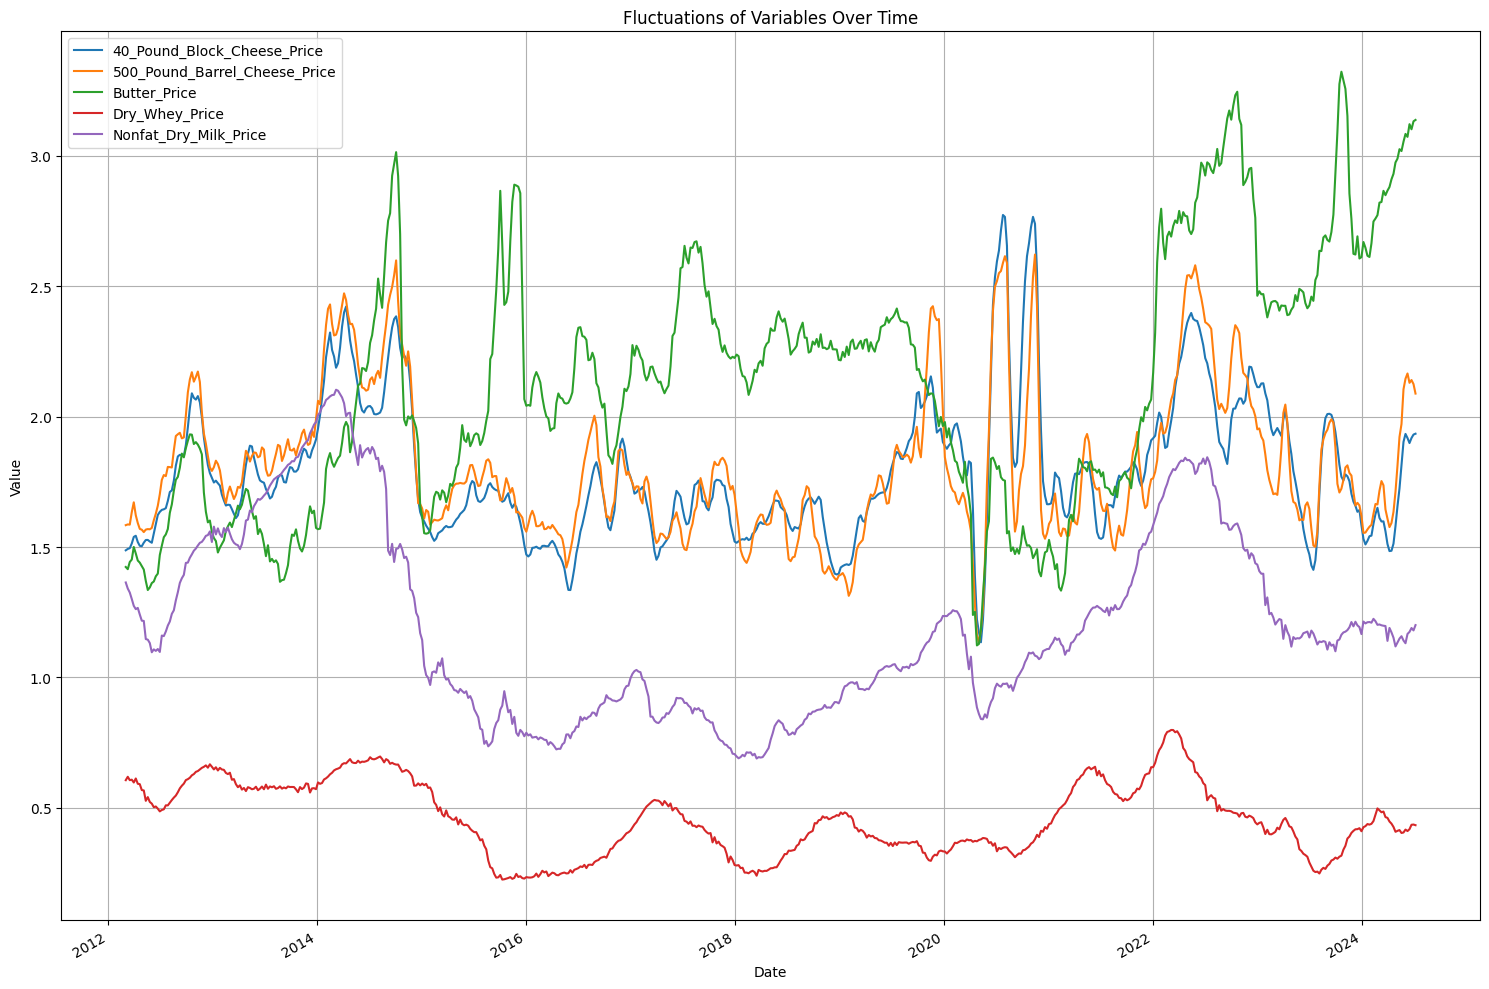

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def data_preprocess(csv_file, date_column='Date', columns_to_keep=None, n_previous=5, plot=True, figsize=(15, 10)):
    """
    Preprocess the CSV file, handle 0 values by using mean of previous time points, 
    keep only specified columns, save to a new file, and optionally plot the data.
    
    Parameters:
    - csv_file: str, path to the CSV file
    - date_column: str, name of the column containing dates (default: 'Date')
    - columns_to_keep: list of str or None, columns to keep (if None, keep all numeric columns)
    - n_previous: int, number of previous time points to use for calculating mean (default: 5)
    - plot: bool, whether to plot the data (default: True)
    - figsize: tuple, figure size (width, height) in inches for plotting
    """
    # Read the CSV file
    df = pd.read_csv(csv_file)
    
    # Convert date column to datetime
    df[date_column] = pd.to_datetime(df[date_column])
    
    # Set date as index
    df.set_index(date_column, inplace=True)
    
    # Sort the dataframe by date
    df = df.sort_index()
    
    # If columns_to_keep is not specified, use all numeric columns
    if columns_to_keep is None:
        columns_to_keep = df.select_dtypes(include=[np.number]).columns.tolist()
    
    # Keep only the specified columns and the date column
    df = df[columns_to_keep]
    
    # Handle 0 values in specified columns
    for column in columns_to_keep:
        # Find 0 values
        zero_mask = df[column] == 0
        zero_count = zero_mask.sum()
        if zero_count > 0:
            print(f"Found {zero_count} zero values in column {column}")
            # Replace 0 with the mean of previous n non-zero values
            for idx in df[zero_mask].index:
                prev_values = df.loc[:idx, column].iloc[:-1]  # All previous values
                prev_non_zero = prev_values[prev_values != 0]  # Non-zero previous values
                if len(prev_non_zero) >= n_previous:
                    replacement_value = np.round(prev_non_zero[-n_previous:].mean(), 4)
                elif len(prev_non_zero) > 0:
                    replacement_value = np.round(prev_non_zero.mean(), 4)
                else:
                    replacement_value = np.round(df[column].mean(), 4)  # If no previous non-zero values, use overall mean
                df.loc[idx, column] = replacement_value
                print(f"Replaced value at {idx} with {replacement_value}")
    
    # Save preprocessed data to a new CSV file
    original_name = csv_file.split('.')[0]
    new_file_name = f"{original_name}_preprocessed.csv"
    df.to_csv(new_file_name)
    print(f"Preprocessed data saved to {new_file_name}")
    
    # Optionally plot the data
    if plot:
        plt.figure(figsize=figsize)
        
        for column in columns_to_keep:
            plt.plot(df.index, df[column], label=column)
        
        plt.title('Fluctuations of Variables Over Time')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.legend(loc='best')
        plt.grid(True)
        
        # Rotate and align the tick labels so they look better
        plt.gcf().autofmt_xdate()
        
        # Use tight layout to prevent clipping of labels
        plt.tight_layout()
        
        # Show the plot
        plt.show()
    
    return df

# Example usage:
preprocessed_df = data_preprocess('dairy.csv', 
                                  date_column='Date', 
                                  columns_to_keep=['40_Pound_Block_Cheese_Price', 
                                                   '500_Pound_Barrel_Cheese_Price', 
                                                   'Butter_Price', 
                                                   'Dry_Whey_Price',
                                                   'Nonfat_Dry_Milk_Price'],
                                  n_previous=5,
                                  plot=True)

### Dairy ABM
Tried to build a simple agent-based model to simulate the dairy industry. 

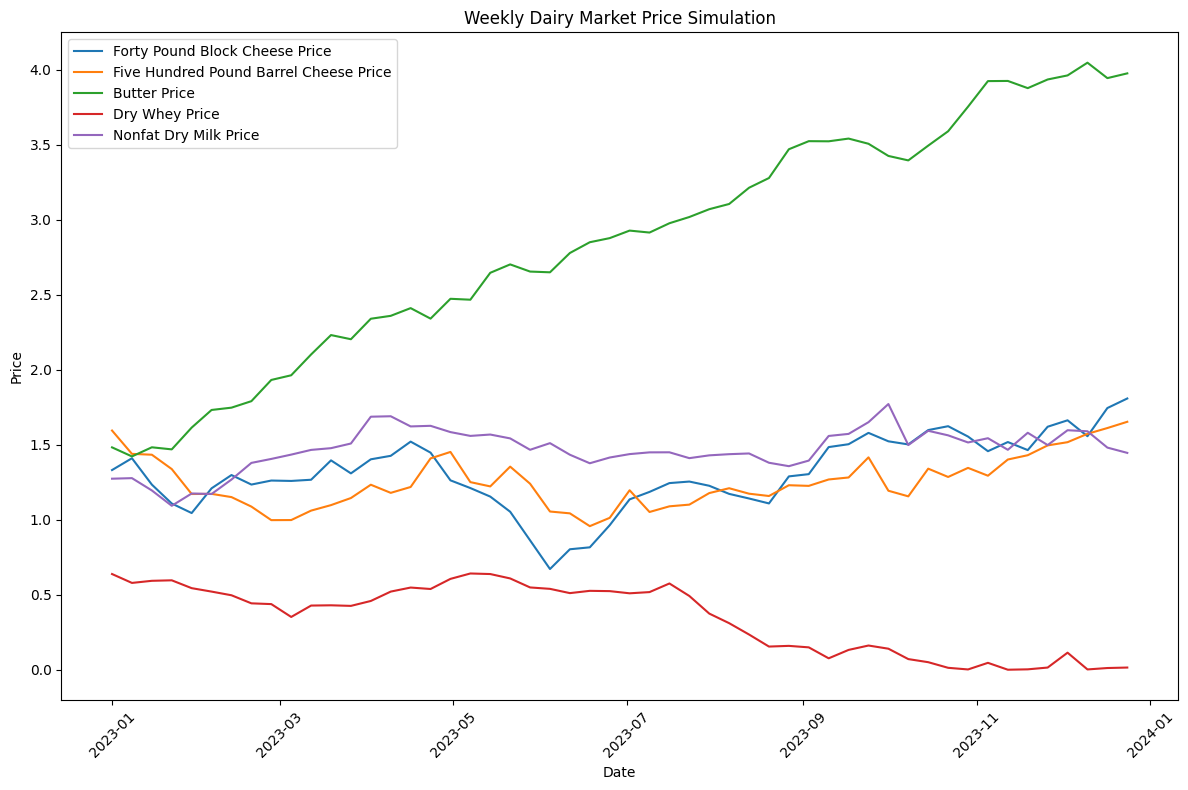

Data saved to simulated_dairy_data.csv


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta

class DairyMarket:
    def __init__(self, n_weeks=52, start_date=None):
        self.n_weeks = n_weeks
        
        # Set start date
        self.start_date = start_date if start_date else datetime.now()
        
        # Initialize prices
        self.Forty_Pound_Block_Cheese_Price = 1.5
        self.FiveHundred_Pound_Barrel_Cheese_Price = 1.6
        self.Butter_Price = 1.4
        self.Dry_Whey_Price = 0.6
        self.Nonfat_Dry_Milk_Price = 1.35
        
        # Store price histories
        self.Forty_Pound_Block_Cheese_Price_history = []
        self.FiveHundred_Pound_Barrel_Cheese_Price_history = []
        self.Butter_Price_history = []
        self.Dry_Whey_Price_history = []
        self.Nonfat_Dry_Milk_Price_history = []
        self.dates = []

    def step(self):
        # Simulate weekly price changes
        self.Forty_Pound_Block_Cheese_Price += np.random.normal(0, 0.1)
        self.FiveHundred_Pound_Barrel_Cheese_Price += np.random.normal(0, 0.1)
        self.Butter_Price += np.random.normal(0, 0.1)
        self.Dry_Whey_Price += np.random.normal(0, 0.05)
        self.Nonfat_Dry_Milk_Price += np.random.normal(0, 0.07)

        # Make sure prices are not negative
        self.Forty_Pound_Block_Cheese_Price = max(0, self.Forty_Pound_Block_Cheese_Price)
        self.FiveHundred_Pound_Barrel_Cheese_Price = max(0, self.FiveHundred_Pound_Barrel_Cheese_Price)
        self.Butter_Price = max(0, self.Butter_Price)
        self.Dry_Whey_Price = max(0, self.Dry_Whey_Price)
        self.Nonfat_Dry_Milk_Price = max(0, self.Nonfat_Dry_Milk_Price)
        
        # Simulate price correlations 
        # TODO: How do I know the correlations? And how to estimate these correlations?
        self.FiveHundred_Pound_Barrel_Cheese_Price += 0.2 * (self.Forty_Pound_Block_Cheese_Price - self.FiveHundred_Pound_Barrel_Cheese_Price)
        self.Butter_Price += 0.1 * (self.Nonfat_Dry_Milk_Price - 1.0)
        self.Dry_Whey_Price += 0.05 * (self.Forty_Pound_Block_Cheese_Price - 1.5)
        
        # Store prices
        self.Forty_Pound_Block_Cheese_Price_history.append(self.Forty_Pound_Block_Cheese_Price)
        self.FiveHundred_Pound_Barrel_Cheese_Price_history.append(self.FiveHundred_Pound_Barrel_Cheese_Price)
        self.Butter_Price_history.append(self.Butter_Price)
        self.Dry_Whey_Price_history.append(self.Dry_Whey_Price)
        self.Nonfat_Dry_Milk_Price_history.append(self.Nonfat_Dry_Milk_Price)
        
        # Add date (weekly)
        self.dates.append(self.start_date + timedelta(weeks=len(self.dates)))
        
    def run(self):
        for _ in range(self.n_weeks):
            self.step()
            
    def plot_results(self):
        plt.figure(figsize=(12, 8))
        plt.plot(self.dates, self.Forty_Pound_Block_Cheese_Price_history, label='Forty Pound Block Cheese Price')
        plt.plot(self.dates, self.FiveHundred_Pound_Barrel_Cheese_Price_history, label='Five Hundred Pound Barrel Cheese Price')
        plt.plot(self.dates, self.Butter_Price_history, label='Butter Price')
        plt.plot(self.dates, self.Dry_Whey_Price_history, label='Dry Whey Price')
        plt.plot(self.dates, self.Nonfat_Dry_Milk_Price_history, label='Nonfat Dry Milk Price')
        plt.legend()
        plt.title('Weekly Dairy Market Price Simulation')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
    def save_to_csv(self, filename='simulated_dairy_data.csv'):
        df = pd.DataFrame({
            'Date': self.dates,
            '40_Pound_Block_Cheese_Price': self.Forty_Pound_Block_Cheese_Price_history,
            '500_Pound_Barrel_Cheese_Price': self.FiveHundred_Pound_Barrel_Cheese_Price_history,
            'Butter_Price': self.Butter_Price_history,
            'Dry_Whey_Price': self.Dry_Whey_Price_history,
            'Nonfat_Dry_Milk_Price': self.Nonfat_Dry_Milk_Price_history
        })
        df.set_index('Date', inplace=True)
        df.to_csv(filename)
        print(f"Data saved to {filename}")

# 運行模擬
market = DairyMarket(n_weeks=52, start_date=datetime(2023, 1, 1))
market.run()
market.plot_results()
market.save_to_csv()